                                                                MovieLenMovieLens 100K Data Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


In [22]:
# Load ratings
ratings = pd.read_csv('data/u.data', sep='\t', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# Quick look
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
# Load movies
movies = pd.read_csv('data/u.item', sep='|', encoding='latin-1', names=[
    'MovieID', 'Title', 'ReleaseDate', 'VideoReleaseDate', 'IMDbURL',
    'Unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
    'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror',
    'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'
])

# Quick look
movies.head()

,MovieID,Title,ReleaseDate,VideoReleaseDate,IMDbURL,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [5]:
# Shape of datasets
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

# Check for missing values
print("\nRatings missing values:\n", ratings.isna().sum())
print("\nMovies missing values:\n", movies.isna().sum())

# Check datatypes
ratings.info()
movies.info()

Ratings shape: (100000, 4)
Movies shape: (1682, 24)

Ratings missing values:
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Movies missing values:
 MovieID                0
Title                  0
ReleaseDate            1
VideoReleaseDate    1682
IMDbURL                3
Unknown                0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
FilmNoir               0
Horror                 0
Musical                0
Mystery                0
Romance                0
SciFi                  0
Thriller               0
War                    0
Western                0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UserID     100000 non-null  in

In [24]:
# Merge on MovieID
df = pd.merge(ratings, movies, on='MovieID', how='left')

# Check merged dataframe
df.head()

print(df.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'ReleaseDate', 'VideoReleaseDate', 'IMDbURL', 'Unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'], dtype='str')


In [26]:
movie_stats = df.groupby("Title")["Rating"].agg(["mean", "count"])

# Rename columns for clarity
movie_stats = movie_stats.rename(columns={"mean": "AverageRating", "count": "RatingCount"})

# Step 3: Filter movies with at least 50 ratings
popular_movies = movie_stats[movie_stats["RatingCount"] >= 50]

# Step 4: Sort by AverageRating descending and pick top 10
top_movies = popular_movies.sort_values("AverageRating", ascending=False).head(10)


In [28]:
#Most Rated Movie
most_rated_movie = movie_stats.sort_values("AverageRating", ascending=False).head(10)
print(most_rated_movie)

                                                   AverageRating  RatingCount
Title                                                                        
Aiqing wansui (1994)                                         5.0            1
Entertaining Angels: The Dorothy Day Story (1996)            5.0            1
Santa with Muscles (1996)                                    5.0            2
Prefontaine (1997)                                           5.0            3
They Made Me a Criminal (1939)                               5.0            1
Saint of Fort Washington, The (1993)                         5.0            2
Great Day in Harlem, A (1994)                                5.0            1
Star Kid (1997)                                              5.0            3
Marlene Dietrich: Shadow and Light (1996)                    5.0            1
Someone Else's America (1995)                                5.0            1


In [29]:
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']


In [32]:
genre_avg_rating={}

for genre in genres:
    genre_movies= df[df[genre]==1]

    avg= genre_movies["Rating"].mean()

    genre_avg_rating[genre]= avg

genre_rating_df = pd.DataFrame(list(genre_avg_rating.items()), columns=["Genre", "AverageRating"])
genre_rating_df = genre_rating_df.sort_values("AverageRating", ascending=False)
print(genre_rating_df)


          Genre  AverageRating
9      FilmNoir       3.921523
16          War       3.815812
7         Drama       3.687379
6   Documentary       3.672823
12      Mystery       3.638132
5         Crime       3.632278
13      Romance       3.621705
17      Western       3.613269
2     Animation       3.576699
14        SciFi       3.560723
11      Musical       3.521397
15     Thriller       3.509007
1     Adventure       3.503527
0        Action       3.480245
4        Comedy       3.394073
3      Children       3.353244
10       Horror       3.290389
8       Fantasy       3.215237


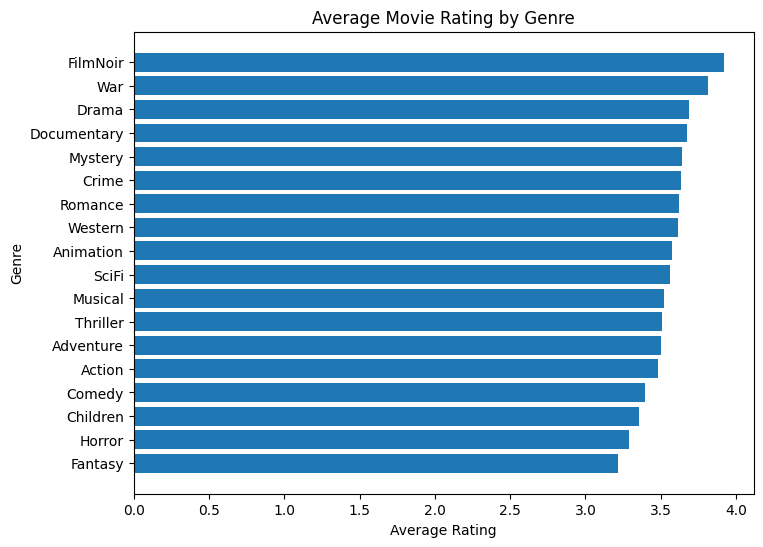

In [37]:
plt.figure(figsize=(8, 6))
plt.barh(genre_rating_df["Genre"], genre_rating_df["AverageRating"])
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Average Movie Rating by Genre")
plt.gca().invert_yaxis()
plt.show()

In [44]:
comparison = movie_stats.sort_values(
    ["RatingCount", "AverageRating"],
    ascending=[False, False]
).head(10)

print(comparison)


                               AverageRating  RatingCount
Title                                                    
Star Wars (1977)                    4.358491          583
Contact (1997)                      3.803536          509
Fargo (1996)                        4.155512          508
Return of the Jedi (1983)           4.007890          507
Liar Liar (1997)                    3.156701          485
English Patient, The (1996)         3.656965          481
Scream (1996)                       3.441423          478
Toy Story (1995)                    3.878319          452
Air Force One (1997)                3.631090          431
Independence Day (ID4) (1996)       3.438228          429


In [47]:
# Key Insights:

# 1. Movies with higher popularity do not always have the highest ratings.

# 2. Documentary, Film-Noir, and War genres have the highest average ratings.

# 3. Drama and Comedy dominate in volume but not always in top ratings.

# 4. Combining popularity and ratings gives better recommendation signals.